In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DSL/220210 Ensemble

/content/drive/MyDrive/DSL/220210 Ensemble


In [4]:
# Prepare dataset
data = np.loadtxt('data.csv', delimiter=',', dtype=float)
labels = data[:, 0]
features = preprocessing.minmax_scale(data[:, 1:])
X_train, X_test, y_train, y_test = train_test_split(features, labels.ravel(), test_size=0.3)

### 의사결정나무
* random_state = 2022 으로 설정
* 변수명은 dt_clf 로 설정

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# 빈 부분 코드 작성
# decision tree
dt_clf = DecisionTreeClassifier(random_state=2022)

In [20]:
# 개별 분류기에 train set 피팅
dt_clf = dt_clf.fit(X_train, y_train)

In [21]:
# test셋으로 prediction
dt_pred = dt_clf.predict(X_test)

In [22]:
# 성능 확인
# accuracy_score 계산
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dt_pred)
print('예측 정확도 {0:.4f}'.format(accuracy))

예측 정확도 0.9208


### 랜덤 포레스트
* random_state = 2022
* 변수명 rf_clf 로

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# random forest
rf_clf = RandomForestClassifier(random_state=2022)

In [26]:
# 개별 분류기에 train set 피팅
rf_clf = rf_clf.fit(X_train,y_train)

In [27]:
# test셋으로 prediction
rf_pred = rf_clf.predict(X_test)

In [28]:
# 성능 확인
# accuracy_score 계산
accuracy = accuracy_score(y_test, rf_pred)
print('예측 정확도 {0:.4f}'.format(accuracy))

예측 정확도 0.9307


### Gradient Boost
* random_state = 2022
* 변수명 gb_clf 로

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
# gradient boost
gb_clf = GradientBoostingClassifier(random_state=2022)

In [32]:
# 개별 분류기에 train set 피팅
gb_clf = gb_clf.fit(X_train,y_train)

In [33]:
# test셋으로 prediction
gb_pred = gb_clf.predict(X_test)

In [34]:
# 성능 확인
# accuracy_score 계산
accuracy = accuracy_score(y_test, gb_pred)
print('예측 정확도 {0:.4f}'.format(accuracy))

예측 정확도 0.9505


### 보고서 과제
1. voting, bagging, random forest, boosting, adaboost, gradient boost 의 특징 및 장단점을 스스로 정리해보기
2. Boosting의 advanced model 인 XGBoost, LightGBM, CatBoost에 대해 찾아보고 정리해보기

### XGBoost(eXtra Gradient Boost)
- GBM에 기반하고 있지만, 느린 수행 시간 및 과적합 규제 부재 들의 문제를 해결해서 각광받고 있음.
- C/C++ 기반으로 작성되어 있어서 파이썬 패키지를 따로 제공하고 있다.
- 사이킷런에서도 연동할 수 있는 래퍼 클래스를 제공하고 있음.(XGBClassifier, XGBRegressor)

---
### LightGBM
- XGBoost와 함께 부스팅 계열 알고리즘에서 각광받고 있음
- 학습에 걸리는 시간이 훨씬 적다. 그러나 예측 성능을 별다른 차이가 없다.
- 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위해 균형 트리 분할(Level Wise)를 사용한다. 그러나 LightGBM의 경우 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다. 
- 추가로 최근에는 GPU 지원도 하고 있다.
- 사이킷런에서도 지원함(LGBMClassifier, LGBMRegressor)

-------

###CatBoost
- 균형 트리 분할(Level Wise)를 사용한다.
- 일부만 가지고 잔차계산을 한 뒤, 그것으로 모델을 만들고 그 후 데이터의 잔차는 이 모델로 예측한 값을 사용한다.
- 데이터를 셔플링해서 뽑아낸다. (Random Permutation)
- Target Encoding, Mean Encoding, Response Encoding(3개 다 같은 말)을 사용한다.
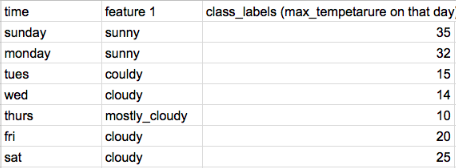

- 예를 들어 위 같은 경우 feature1 의 cloudy 는 다음과 같이 인코딩 할 수 있다.
- cloudy = (15 +14 +20 + 25)/4 = 18.5
- 즉, cloudy 를 cloudy 를 가진 데이터들의 class_label 의 값의 평균으로 인코딩 하는 것이다. 이 때문에 Mean encoding 이라 불리기도 한다.

- 자세한 내용은 https://dailyheumsi.tistory.com/136 참고